# Name : Sahil Garg

# GRIPFEB21 @ The Sparks Foundation 

# TASK 1 - Prediction using Supervised ML for calculating percentage of an student based on the number of study hours.

## Problem Statement : What will be predicted score if a student studies for 9.25 hrs/ day?

## DataSet : http://bit.ly/w-data

### Importing the required libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Importing the Dataset from URL

In [3]:
url = "http://bit.ly/w-data"
data= pd.read_csv(url)
print("Data loaded successfully!")
data.head()

Data loaded successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.shape

(25, 2)

# Checking the Correlation between the variables


### Representing the correlation using heatmap

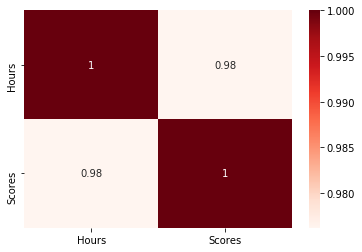

In [43]:
#Analyzing the relationship between no of hours studied and score percentage using correlation
correlation_matrix = data.corr()
correlation_matrix
sns.heatmap(data=correlation_matrix, cmap="Reds", annot=True)
plt.show()

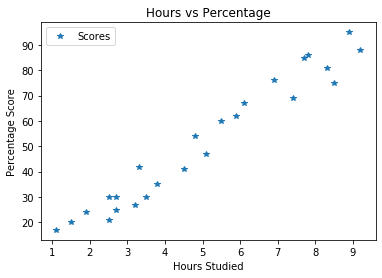

In [19]:
# Plotting
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

By seeing the graph above, it can be assumed that there is a positive relationship between the number of hours studied and the percentage score

## Creating the prediction model
 
 #### We divide the dataset into attributes and labels to X and y respectively
 #### Splitting the dataset : 80% for training and 20% for testing
 #### Training the dataset using LinearRegression()
 #### Plotting the regression line

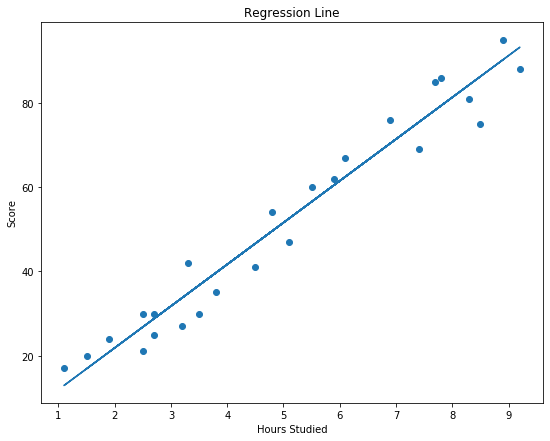

In [20]:
#Assigning the attributes to X and labels to y
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

#Splitting the dataset for training and testing of model
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Training the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

# Plotting the regression line
regline = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(9,7))
plt.scatter(X, y)
plt.plot(X, regline);
plt.title("Regression Line")
plt.xlabel('Hours Studied')  
plt.ylabel('Score') 
plt.show()

# Predicting the values and comparing them
#### Predicting the values in testing dataset

In [45]:
#Using model to make predictions
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
df

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Estimating training and test score

In [44]:
# Training score
print("Training Score: ", regressor.score(X_train,y_train))
# Test Score
print("Test Score: ", regressor.score(X_test,y_test))

Training Score:  0.9515510725211553
Test Score:  0.9454906892105356


### Visualizing the difference between actual and predicted result

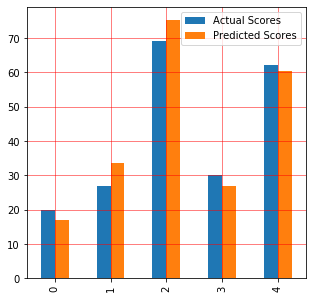

In [47]:
df.plot(kind='bar', figsize=(5,5))
plt.grid(linewidth='0.5', color='blue')
plt.grid(linewidth='0.5', color='red')

# Testing with Data

In [39]:
hour = 9.25 #Provided Value
h = np.array(hour) # convert to a numpy array
h= h.reshape(1, -1)
prediction = regressor.predict(h)
print("Number of Hours = {}".format(hour))
print("Predicted Score = {}".format(prediction[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737538


### The Predicted score is 93.69

# Model Evaluation

In [40]:
# MODEL EVALUATION
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

mse = (mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error:",mse)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Square Error:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

Mean Absolute Error: 4.183859899002975
Root Mean Square Error: 4.6474476121003665
R-Square: 0.9454906892105356


## Conclusion :  From the R-Square value we can identify a 94% accuracy for our prediction model